# Model aimed at Classification

The object aims to classify an image based on the object in the image.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.model_selection import train_test_split

DATADIR = "C:/Users/aaron/Documents/UWO/2024-2025/Term 2/AISE 4020/test_dataset"
CATEGORIES = ['fork', 'knife', 'spoon']
# CATEGORIES = ['Milk box', 'Paper bag', 'Newspaper', 'Plastic Basket', 'Basketball', 'Cup', 'Can', 'Glass bottles', 'Mushroom', 'Crab shell', 'Lead-acid batteries']

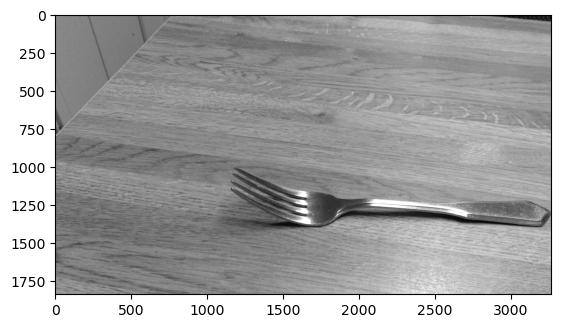

In [ ]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        print("Example image:")
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

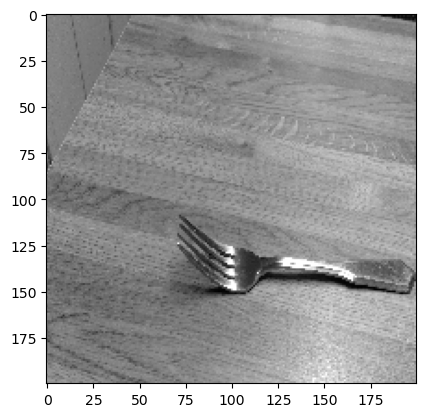

In [ ]:
# Resize all images to reduce pixels
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
# creating data
data = []
IMG_SIZE = 200

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
random.shuffle(data)

13

In [120]:
# make X and y
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

y = np.array(y)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X.astype('float32') / 255.0


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Make CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    

# Print model summary
model.summary()


c:\Users\aaron\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train Model

In [123]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=3)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.4200 - loss: 2.8735
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.2644 - loss: 1.1778
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.4822 - loss: 1.1525
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.6178 - loss: 1.0242
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.2933 - loss: 1.1068
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.6467 - loss: 0.8493
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.7422 - loss: 0.6700
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.1926
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 1.0000 - loss: 0.0352
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 1.0000 - loss: 0.0147


### Test model

In [132]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test results
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3333 - loss: 0.9635
Test loss: 0.9635014533996582
Test accuracy: 0.3333333432674408


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


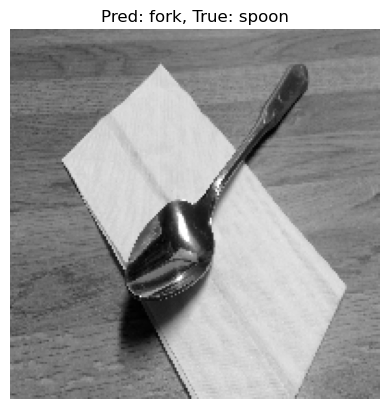

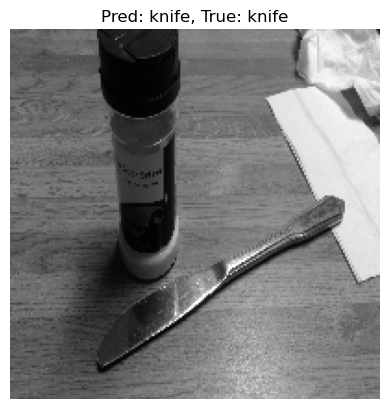

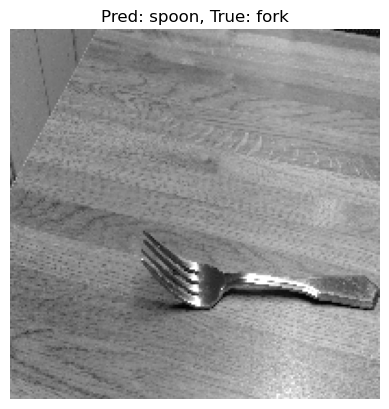

In [133]:
# Get predictions on the test set
y_pred = model.predict(X_test)

# Display some test images with their predicted and actual labels
num_images = 3  # Number of images to display
for i in range(num_images):
    # Get the image, predicted label, and true label
    image = X_test[i].reshape(IMG_SIZE, IMG_SIZE)  # Reshape if needed (depends on your input shape)
    predicted_label = np.argmax(y_pred[i])  # Get the predicted class index
    true_label = y_test[i]  # True label
    
    # Display the image
    plt.imshow(image, cmap='gray')  # Use 'gray' for grayscale images
    plt.title(f"Pred: {CATEGORIES[predicted_label]}, True: {CATEGORIES[true_label]}")
    plt.axis('off')  # Hide axes
    plt.show()